<a href="https://colab.research.google.com/github/MuddyMuk/Python_Sims/blob/main/Wealth_Forecast_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Wealth is expected to be 1,249,284,347.03円 through the simulation
Non-bankruptcy runs: 6 / 10


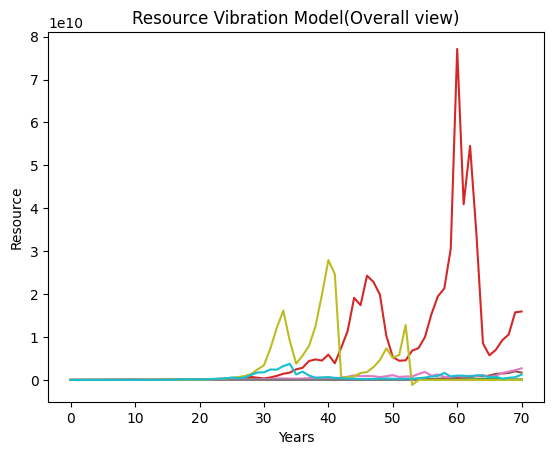

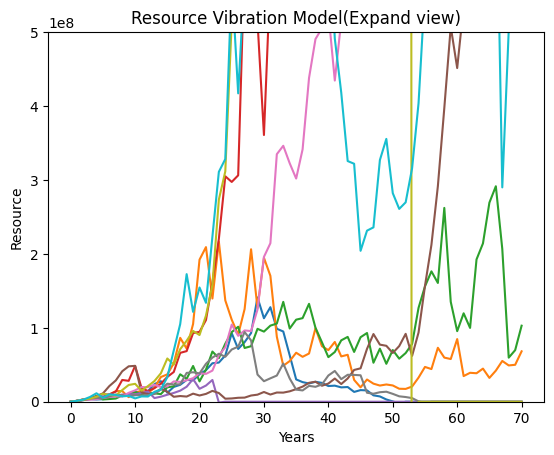

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def determin_std(mean, geometry_ave):
    """
    Calculate the standard deviation for a normal distribution
    given the arithmetic mean and geometric mean.

    The geometric mean must be smaller than the arithmetic mean
    for the standard deviation to be a real number.
    """
    std = np.sqrt(200 * abs(mean - geometry_ave))
    return std

def simulate_wealth(mean1, geometry_ave1, dynamic_volatility, yearly_contribution, years_contribute, years_to_retire, yearly_spend):
    """
    Run multiple wealth growth simulations over a 70-year period.

    Models investment returns, contributions, retirement witdrawals,
    and rare market shocks.Outputs average wealth and survival rate.
    """
    runs = 10 # the trials times in the simultion
    aveWealth = np.zeros(runs)
    all_wealths = []
    run_success_count = 0
    GOOD_EVENT_PROB = 0.03
    GOOD_EVENT_MULTI =1.05
    BAD_EVENT_PROB = 0.99
    BAD_EVENT_MULTI = 0.7
    # Fixed parameters for rare market shocks

    for run in range(runs):
      # Run loop: Repeat the wealth simulation on the same condition in multiple times
        years = np.arange(0, 71, dtype=int)
        wealth = np.zeros(len(years))
        Re1 = np.zeros(len(years))
        Re1[0] = mean1
        # Re1 values is fluctuated depended on the Re1 value in the prior years and equivalent to the arithmetic mean of the wealth
        broke = False
        if dynamic_volatility == False:
          std1 = determin_std(mean1,geometry_ave1)

        for year in range(len(years) - 1):
          # Annual loop: simulate investment returns and random events for each year
            if dynamic_volatility == True:
              std1 = determin_std(Re1[year], geometry_ave1)
            volatility1 = std1 / 100 * np.random.randn()

            if year < years_to_retire:
                if year < years_contribute:
                    wealth[year + 1] = wealth[year] * (1 + Re1[year] / 100 + volatility1) + yearly_contribution
                else:
                    wealth[year + 1] = wealth[year] * (1 + Re1[year] / 100 + volatility1)
            else:
                wealth[year + 1] = wealth[year] * (1 + Re1[year] / 100 + volatility1) - yearly_spend
            Re1[year + 1] = Re1[year] + volatility1
            event_probe = random.random()

            # Good events: Simulate a rare positive market shock (3% chance, +5% wealth)
            if event_probe < GOOD_EVENT_PROB:
              wealth[year + 1] *= GOOD_EVENT_MULTI

            # Bad events: Simulate a rare market crash (1% chance, -30% wealth)
            elif event_probe > BAD_EVENT_PROB:
              wealth[year + 1] *= BAD_EVENT_MULTI

            if wealth[year + 1] < 0:
                broke = True #Stop the simulation if the portofolio goes bankrupt.
                break

        if not broke:
          run_success_count += 1

        all_wealths.append(wealth.copy()) # all_wealth data are to be used in two ways: Overall view and Expand view
        aveWealth[run] = np.mean(wealth)

    averageWealth = np.mean(aveWealth)
    print(f"Wealth is expected to be {averageWealth:,.2f}円 through the simulation") # Measure the efficiency in making property
    print(f"Non-bankruptcy runs: {run_success_count} / {runs}") # Measure the stability of strategy
    plt.figure()
    for wealth in all_wealths:
      plt.plot(years, wealth)
    plt.xlabel("Years")
    plt.ylabel("Resource")
    plt.title("Resource Vibration Model(Overall view)")
    plt.show()

    plt.figure()
    for wealth in all_wealths:
      plt.plot(years, wealth)
    plt.ylim(0, 5e8)
    plt.title("Resource Vibration Model(Expand view)")
    plt.xlabel("Years")
    plt.ylabel("Resource")
    plt.show()

# ✅ An Example of parameters in the simulation
simulate_wealth(
    mean1=9.800,            # Expected annual return（%）
    geometry_ave1=4.5000,   # Geometric average of the annual return（%）
    dynamic_volatility=True, #True or False
    yearly_contribution=1200000,  # Accumulated fund in a year（円）
    years_contribute=30, # years (with fund accumulation) before the retirement
    years_to_retire=35,  # years (no fund accumulation) before the retirement
    yearly_spend=2400000 # Annual spendings after the retirement (円)
)
